In [22]:
#In this notebook we will be doing some sentiment analysis in python using two different techniques:

#1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
#2. Roberta Pretrained Model from 🤗
#3. Huggingface Pipeline

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [24]:
df = pd.read_csv('/Users/nihalcoskun/Desktop/CSE/Staj 2/archive/Reviews.csv')

In [25]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [27]:
df = df.head(500)

<function matplotlib.pyplot.show(close=None, block=None)>

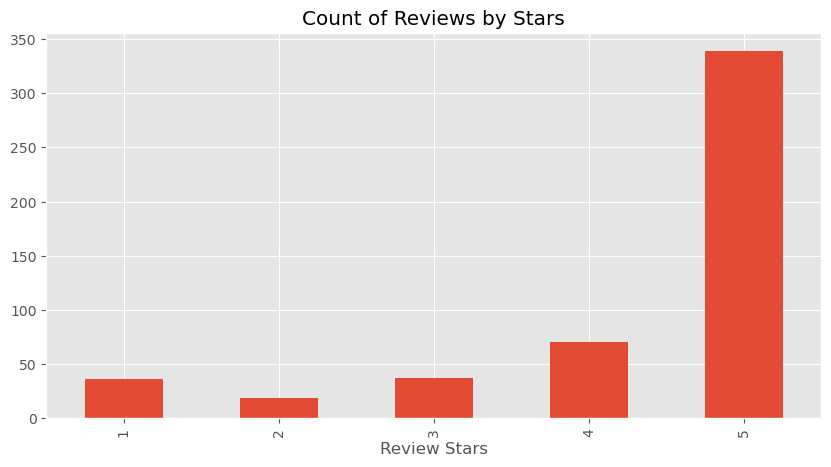

In [28]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar',
                                             title = "Count of Reviews by Stars",
                                            figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show

In [29]:
#BASIC NLTK
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [32]:
import nltk
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data] Downloading package words to
[nltk_data]     /Users/nihalcoskun/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [34]:
#VADER Seniment Scoring
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nihalcoskun/nltk_data...


In [35]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [36]:
sia.polarity_scores('I am so bad!')

{'neg': 0.671, 'neu': 0.329, 'pos': 0.0, 'compound': -0.623}

In [37]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [38]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [41]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [42]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [43]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [47]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [48]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: xlabel='Score', ylabel='compound'>

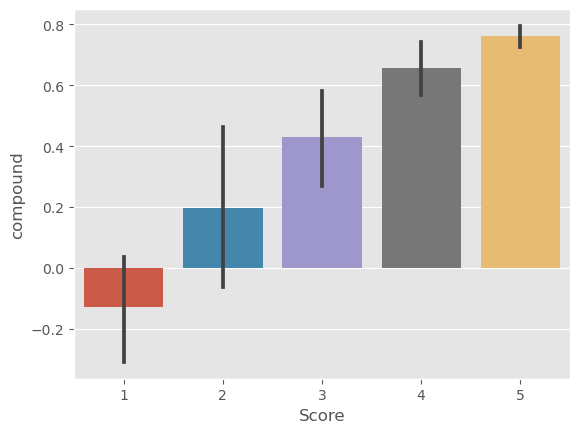

In [53]:
sns.barplot(data = vaders, x='Score', y='compound')

Text(0.5, 1.0, 'Negative Review')

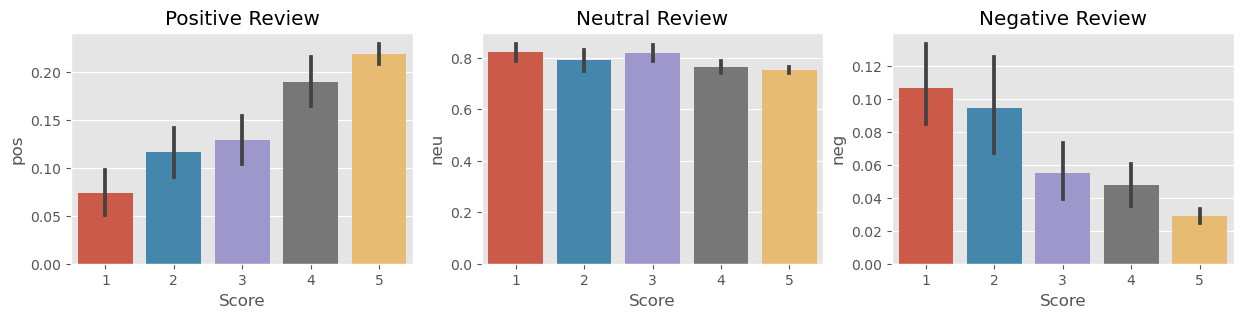

In [62]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data = vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data = vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data = vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive Review')
axs[1].set_title('Neutral Review')
axs[2].set_title('Negative Review')

In [73]:
#Bu kod parçası, Hugging Face Transformers kütüphanesini kullanarak
#önceden eğitilmiş bir duygu sınıflandırma modelini yüklemeyi ve kullanmayı amaçlamaktadır

In [74]:
#AutoTokenizer ve AutoModelForSequenceClassification sınıfları, 
#otomatik olarak önceden eğitilmiş model ve tokenizasyon işlevlerini 
#yüklememizi sağlar. softmax işlevi, sonuçların olasılıklara dönüştürülmesine yardımcı olur.

In [75]:
#Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [76]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #"cardiffnlp.." adlı bir Twitter duygu analizi modelini kullanacağımızı belirtiyoruz
tokenizer = AutoTokenizer.from_pretrained(MODEL) #model adını kullanarak tokenizasyon işlevini yüklüyor. Tokenizasyon, metinleri modelin anlayabileceği sayısal biçime çevirme işlemidir.
model = AutoModelForSequenceClassification.from_pretrained(MODEL) #belirttiğimiz model adını kullanarak duygu sınıflandırma modelini yüklüyor

In [77]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [102]:
print(example)
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta neg' : scores[0],
    'roberta neu' : scores[1],
    'roberta pos' : scores[2],
}
print(scores_dict) #daha net keskin olasılık değerleri dönüyor

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'roberta neg': 0.97635514, 'roberta neu': 0.020687466, 'roberta pos': 0.0029573708}


In [86]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta neg' : scores[0],
    'roberta neu' : scores[1],
    'roberta pos' : scores[2],
    }
    return scores_dict

In [96]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [ ]:
both

In [103]:
print(df['Text'][30])
newComment = df['Text'][30]
sia.polarity_scores(newComment)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


{'neg': 0.041, 'neu': 0.692, 'pos': 0.267, 'compound': 0.9713}

In [105]:
import torch
from transformers import pipeline

# tokenizer ve model tanımlamalarını burada gerçekleştirin
# ...

# Metni uygun hale getirin
newComment = df['Text'][30]
inputs = tokenizer(newComment, return_tensors='pt')

# Modeli metin üzerinde çalıştırın
with torch.no_grad():
    outputs = model(**inputs)

# Sonuçları alın
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=1)
predicted_class = torch.argmax(probabilities)

print("Logits:", logits)
print("Probabilities:", probabilities)
print("Predicted class:", predicted_class)

Logits: tensor([[-2.3933, -0.4776,  3.6072]])
Probabilities: tensor([[0.0024, 0.0165, 0.9811]])
Predicted class: tensor(2)


In [109]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Önceden tanımlanan model ve tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Örnek girdi verisi
input_text = "I hate my life. everything is terrible!"

# Tokenizasyon işlemi
inputs = tokenizer(input_text, return_tensors='pt')
print(inputs)

# Bu satır, modelin tokenleştirilmiş girdi verisi üzerinde tahmin yapmasını sağlar
with torch.no_grad():
    outputs = model(**inputs)

# Softmax fonksiyonunu kullanarak olasılıkları hesaplama
logits = outputs.logits
probabilities = softmax(logits, axis=1)

# Etiket adları ve olasılıkları içeren sözlük oluşturma
label_names = ["neg", "neu", "pos"]
label_probabilities = probabilities[0].tolist()
result_dict = {f"roberta {label}": prob for label, prob in zip(label_names, label_probabilities)}

# Sonuçları yazdırma
print(result_dict)

{'input_ids': tensor([[   0,  100, 4157,  127,  301,    4,  960,   16, 6587,  328,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
{'roberta neg': 0.9833632707595825, 'roberta neu': 0.013134248554706573, 'roberta pos': 0.0035024997778236866}
